# imports and constants

In [1]:
configs=  "N://TESE//Bullwhip//simulation_configuration.py"


In [2]:
import pandas as pd
import numpy as np
import json
import csv
import os
import matplotlib.pyplot as plt



FINAL_EXPORT_FILES_PATH = "N://TESE//Bullwhip//data//results//sim_20220919_205644//"
files_in_folder = os.listdir(FINAL_EXPORT_FILES_PATH)
original_data = "N://TESE//Bullwhip//data//input//data_amplified.csv"


In [3]:


inventory_files = {} 
i=0
for file in files_in_folder:
    if "inventory" in file:
        if "actor_" in file:
            inventory_files[f"actor_{i}"] = file
            i+=1
    
inventory_files
# orders_df= pd.read_csv(FINAL_EXPORT_FILES_PATH + orders[-1]) 
# transactions_df = pd.read_json(FINAL_EXPORT_FILES_PATH + transactions_files[-1])
# inventory_df = pd.read_json(FINAL_EXPORT_FILES_PATH + inventory_files[-1])

#remove space from column names
# orders_df.columns=orders_df.columns.str.lstrip()


{'actor_0': 'inventory_actor_0_20220919_205644.json',
 'actor_1': 'inventory_actor_1_20220919_205644.json',
 'actor_2': 'inventory_actor_2_20220919_205644.json',
 'actor_3': 'inventory_actor_3_20220919_205644.json',
 'actor_4': 'inventory_actor_4_20220919_205644.json',
 'actor_5': 'inventory_actor_5_20220919_205644.json'}

# Inventory

In [4]:
def read_inventory_file(file_path):
    with open(file_path, "r") as file:
        data = file.read()
        data= data.replace("'",'"')[:-2].replace("\n",'').replace(" ",'')
        
        data = '{"data":[' + data + ']}'
        return data






In [5]:


inventories={}
for actor, inv in inventory_files.items():
    inicial_data = read_inventory_file(FINAL_EXPORT_FILES_PATH + inventory_files[actor])
    inventories[actor] = pd.read_json(inicial_data, orient="split")
    inventories[actor] = pd.concat([inventories[actor].drop(['inventory'], axis=1), inventories[actor]['inventory'].apply(pd.Series)], axis=1)



# for actor in inventories.values():
#     actor.plot(x='day')



In [16]:
inventories['actor_0']

,day,0,1001
0,1,0.0,NaN
1,2,0.0,NaN
2,3,0.0,NaN
3,4,0.0,NaN
4,5,0.0,NaN
...,...,...,...
5735,5736,0.0,1342398.0
5736,5737,0.0,1342398.0
5737,5738,0.0,1342398.0
5738,5739,0.0,1342398.0


# Orders

In [6]:
orders_files = {} 
for file in files_in_folder:
    if "orders_closed" in file:
        if "actor_" in file:
            orders_files[ f"{file.split('2022')[0][:-1]}"] = file
    if "orders_open" in file:
        if "actor_" in file:
            orders_files[f"{file.split('2022')[0][:-1]}"] = file
orders_files            



{'orders_closed_actor_1': 'orders_closed_actor_1_20220919_205644.csv',
 'orders_closed_actor_2': 'orders_closed_actor_2_20220919_205644.csv',
 'orders_closed_actor_3': 'orders_closed_actor_3_20220919_205644.csv',
 'orders_closed_actor_4': 'orders_closed_actor_4_20220919_205644.csv',
 'orders_closed_actor_5': 'orders_closed_actor_5_20220919_205644.csv',
 'orders_open_actor_1': 'orders_open_actor_1_20220919_205644.csv',
 'orders_open_actor_2': 'orders_open_actor_2_20220919_205644.csv',
 'orders_open_actor_3': 'orders_open_actor_3_20220919_205644.csv',
 'orders_open_actor_4': 'orders_open_actor_4_20220919_205644.csv',
 'orders_open_actor_5': 'orders_open_actor_5_20220919_205644.csv'}

In [7]:
orders={}
import matplotlib.pyplot as plt

# fig, axes = plt.subplots(nrows=2, ncols=5)

# df1.plot(ax=axes[0,0])
# df2.plot(ax=axes[0,1])

for actor, inv in orders_files.items():
    headers= ["Criation_day"," Product", "Quantity", "Client"," Order_id", "Status", "Notes"]
    # df= pd.DataFrame(data, columns=headers)
    orders[actor] = pd.read_csv(FINAL_EXPORT_FILES_PATH + inv, names=headers , index_col=False)
    
# print(orders.keys())
i=0
j=0


def print_orders_plots():
    for actor, df in orders.items():
        print(actor)
        df.plot(x='Criation_day', y='Quantity', kind='scatter',  title=actor)
        # if i<6:
        #     i+=1
        # if i>=6:
        #     j=2


orders_combined = pd.concat(orders.values(), axis=0, ignore_index=True)

orders_combined

# inicial_data
# # for actor in inventories.values():
# #     actor.plot(x='day')

,Criation_day,Product,Quantity,Client,Order_id,Status,Notes
0,19,1001,10090,0,1000001,9,{}
1,19,1001,10305,0,1000002,9,{}
2,19,1001,10368,0,1000003,9,{}
3,19,1001,10388,0,1000004,9,{}
4,19,1001,10284,0,1000005,9,{}
...,...,...,...,...,...,...,...
5971,2,5001,29167153,4,5000002,0,{}
5972,3,5001,29201250,4,5000003,0,{}
5973,4,5001,29231007,4,5000004,0,{}
5974,5,5001,29256787,4,5000005,0,{}


In [8]:
# orders_df[orders_df.Client == 2]["Quantity"].plot()

In [9]:
# client_3

In [10]:



# client_1 = orders_df[orders_df.Client == 1]["Quantity"]
# client_2 = orders_df[orders_df.Client == 2]["Quantity"]
# client_3 = orders_df[orders_df.Client == 3]["Quantity"]
# client_4 = orders_df[orders_df.Client == 4]["Quantity"]
# # orders_client["Quantity"].plot()
# # print("Client: ", client)
# # print("")
# # orders_client.plot(subplots=True, layout=(1,2))

# #define number of rows and columns for subplots
# nrow=2
# ncol=2
# df_list = [client_1 ,client_2, client_3, client_4]
# fig, axes = plt.subplots(nrow, ncol)

# # plot counter
# count=0
# for r in range(nrow):
#     for c in range(ncol):
#         df_list[count].plot(ax=axes[r,c], figsize=(20  ,20))
#         count+=1


# Transactions

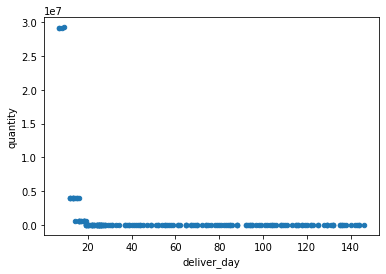

In [11]:
for file in files_in_folder:
    if "transactions_closed" in file:
        trans_data=read_inventory_file((FINAL_EXPORT_FILES_PATH + file))
transactions = pd.read_json(trans_data, orient="split")
# inventories[actor] = pd.concat([inventories[actor].drop(['inventory'], axis=1), inventories[actor]['inventory'].apply(pd.Series)], axis=1)
transactions.sort_values(by=["deliver_day", "receiver"], inplace=True)
transactions.plot(x='deliver_day', y='quantity', kind='scatter')
transactions.index = transactions["transaction_id"]

Métricas para exportar

In [12]:
total_transaction_quantity = transactions[["quantity"]].sum()
avg_transaction_quantity = transactions[["quantity"]].mean()
std_transaction_quantity = transactions[["quantity"]].std()


avg_transactions_leadtime = transactions[["lead_time"]].mean()
std_transactions_leadtime = transactions[["lead_time"]].std()

transactions.describe()

,deliver_day,order_id,order_criation_day,sending_day,receiver,sender,product,quantity,transit_time,lead_time,theoretical_lead,update_day,transaction_id,delivered
count,186.000000,1.860000e+02,186.000000,186.000000,186.000000,186.000000,186.00000,1.860000e+02,186.000000,186.000000,186.000000,186.000000,186.000000,186.0
mean,62.344086,1.500055e+06,54.881720,56.973118,0.500000,1.500000,1501.00000,9.172608e+05,7.462366,8.575269,7.462366,63.456989,95.456989,1.0
std,42.477210,1.004022e+06,44.583441,42.424169,1.004046,1.004046,1004.04587,4.306043e+06,4.166946,5.115660,4.166946,41.406107,53.911547,0.0
min,7.000000,1.000001e+06,1.000000,1.000000,0.000000,1.000000,1001.00000,8.875000e+03,2.000000,2.000000,2.000000,7.000000,1.000000,1.0
25%,24.000000,1.000047e+06,11.000000,19.000000,0.000000,1.000000,1001.00000,9.494000e+03,5.000000,5.000000,5.000000,26.000000,49.250000,1.0
50%,53.000000,1.000094e+06,47.500000,47.500000,0.000000,1.000000,1001.00000,9.687000e+03,6.000000,6.000000,6.000000,53.000000,95.500000,1.0
75%,98.750000,1.000140e+06,93.750000,93.750000,0.000000,1.000000,1001.00000,1.038300e+04,8.000000,11.000000,8.000000,98.750000,141.750000,1.0
max,146.000000,5.000004e+06,140.000000,140.000000,4.000000,5.000000,5001.00000,2.923101e+07,23.000000,23.000000,23.000000,146.000000,188.000000,1.0


In [13]:
orders_combined.describe()

avg_orders_site = orders_combined[["Quantity"]].mean()
avg_orders_site = orders_combined[["Quantity"]].std()


In [14]:
# total_transaction_quantit
avg_transaction_quantity 
std_transaction_quantity 
avg_transactions_leadtime
std_transactions_leadtime

print( "\n"
      "|-------> Transações\n"
    f"Lead Time - média: {avg_transactions_leadtime[0]:,.{0}f} dias\n".replace(',', ' ')+
    f"Lead Time - std: {std_transactions_leadtime[0]:,.{0}f} dias\n".replace(',', ' ')+
    f"Quantidade encomendada - avg: {transactions[['quantity']].mean()[0]:,.{0}f} dias\n".replace(',', ' ')+
    f"Quantidade encomendada - std: {transactions[['quantity']].std()[0]:,.{0}f} dias \n".replace(',', ' ')+
    f"Quantidade encomendada - min: {transactions[['quantity']].min()[0]:,.{0}f} dias \n".replace(',', ' ')+
    f"Quantidade encomendada - max: {transactions[['quantity']].max()[0]:,.{0}f} dias \n".replace(',', ' ')+
    f"Quantidade encomendada total: {transactions[['quantity']].sum()[0]:,.{0}f} dias \n".replace(',', ' ')
    )
    
    
# for actor, inv in inventories.items():
#     print(actor, f"Inventário médio : {inventories[actor].mean()[0]:,.{0}f} unidades \n".replace(',', ' ')+
#           actor, f"Inventário máximo : {inventories[actor].max()[0]:,.{0}f} unidades \n".replace(',', ' '))

print("|-------> Inventários ")
for actor, inv in inventories.items():
    # print("a",actor)
    for col in inventories[actor].columns:
        # print(col,"----------------------------------------")
        if col != "day":
            # print("a", actor, "c", col, "d",  inventories[actor])
            print(f"{actor} {col} -média: {inventories[actor][col].mean():,.{0}f} unidades \n".replace(',', ' ')+
              f"{actor} {col} -máximo: {inventories[actor][col].max():,.{0}f} unidades \n".replace(',', ' ')+
              f"{actor} {col} -mínimo: {inventories[actor][col].min():,.{0}f} unidades \n".replace(',', ' ')+
              f"{actor} {col} -desvio padrão: {inventories[actor][col].std():,.{0}f} unidades \n".replace(',', ' ')+
              f"{actor} {col} -total: {inventories[actor][col].sum():,.{0}f} unidades\n".replace(',', ' ')
              )


|-------> Transações
Lead Time - média: 9 dias
Lead Time - std: 5 dias
Quantidade encomendada - avg: 917 261 dias
Quantidade encomendada - std: 4 306 043 dias 
Quantidade encomendada - min: 8 875 dias 
Quantidade encomendada - max: 29 231 007 dias 
Quantidade encomendada total: 170 610 504 dias 

|-------> Inventários 
actor_0 0 -média: 0 unidades 
actor_0 0 -máximo: 0 unidades 
actor_0 0 -mínimo: 0 unidades 
actor_0 0 -desvio padrão: 0 unidades 
actor_0 0 -total: 0 unidades

actor_0 1001 -média: 1 329 893 unidades 
actor_0 1001 -máximo: 1 342 398 unidades 
actor_0 1001 -mínimo: 10 305 unidades 
actor_0 1001 -desvio padrão: 98 132 unidades 
actor_0 1001 -total: 7 604 327 201 unidades

actor_1 1001 -média: 19 340 unidades 
actor_1 1001 -máximo: 991 392 unidades 
actor_1 1001 -mínimo: 1 000 unidades 
actor_1 1001 -desvio padrão: 80 603 unidades 
actor_1 1001 -total: 111 009 660 unidades

actor_1 2001 -média: 0 unidades 
actor_1 2001 -máximo: 0 unidades 
actor_1 2001 -mínimo: 0 unidades 